In [2]:
# Decision Tree

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier


In [1]:
import pickle
with open('credit.pkl', 'rb') as f:
    x_credit_train, x_credit_test, y_credit_train, y_credit_test = pickle.load(f)

In [3]:
x_credit_train.shape, y_credit_train.shape

((27693, 3), (27693,))

In [4]:
x_credit_test.shape, y_credit_test.shape

((4888, 3), (4888,))

In [5]:
credit_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
credit_tree.fit(x_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
predict = credit_tree.predict(x_credit_test)
predict

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [8]:
y_credit_test

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

In [11]:
accuracy = accuracy_score(y_credit_test, predict)
accuracy

0.8213993453355155

0.8213993453355155

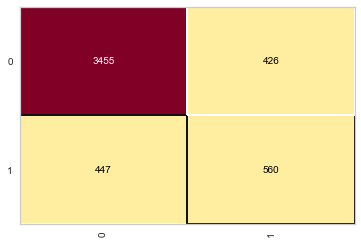

In [12]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(credit_tree)
cm.fit(x_credit_train, y_credit_train)
cm.score(x_credit_test, y_credit_test)

In [13]:
print(classification_report(y_credit_test,predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3881
           1       0.57      0.56      0.56      1007

    accuracy                           0.82      4888
   macro avg       0.73      0.72      0.72      4888
weighted avg       0.82      0.82      0.82      4888



[Text(0.39120825413166777, 0.9871794871794872, 'income <= -0.502\nentropy = 0.761\nsamples = 27693\nvalue = [21592, 6101]\nclass = 0'),
 Text(0.0854254109636593, 0.9615384615384616, 'income <= -0.743\nentropy = 0.993\nsamples = 5281\nvalue = [2896, 2385]\nclass = 0'),
 Text(0.00791044776119403, 0.9358974358974359, 'loan <= -1.054\nentropy = 0.686\nsamples = 891\nvalue = [163, 728]\nclass = 1'),
 Text(0.007659073055773763, 0.9102564102564102, 'income <= -0.842\nentropy = 0.999\nsamples = 341\nvalue = [163, 178]\nclass = 1'),
 Text(0.002639434406912804, 0.8846153846153846, 'loan <= -1.214\nentropy = 0.819\nsamples = 145\nvalue = [37, 108]\nclass = 1'),
 Text(0.0023880597014925373, 0.8589743589743589, 'income <= -0.89\nentropy = 0.997\nsamples = 79\nvalue = [37, 42]\nclass = 1'),
 Text(0.0007541241162608012, 0.8333333333333334, 'loan <= -1.284\nentropy = 0.851\nsamples = 47\nvalue = [13, 34]\nclass = 1'),
 Text(0.0005027494108405342, 0.8076923076923077, 'income <= -0.961\nentropy = 0.981\

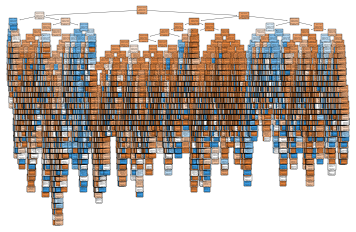

In [20]:
from sklearn import tree
predict_names = ['age', 'income', 'loan']
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
tree.plot_tree(credit_tree, feature_names= predict_names, class_names=['0', '1'],filled=True)


In [21]:
fig.savefig('credit_tree.png')